In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib notebook

In [34]:
def to_float(x, val=-80):
    try:
        return float(x)
    except ValueError:
        return val
    
bands = [31.2,62.5,125,250,500,1000,2000,4000,8000]
acorr = [-39.4,-26.2,-16.1,-8.6,-3.2,0,1.2,1,-1.1,-6.6]
pd.Series({k:v for k,v in zip(bands,acorr)})

31.2     -39.4
62.5     -26.2
125.0    -16.1
250.0     -8.6
500.0     -3.2
1000.0     0.0
2000.0     1.2
4000.0     1.0
8000.0    -1.1
dtype: float64

In [63]:
dfr = pd.read_csv('slm.csv',header=None,encoding='us-ascii',encoding_errors="backslashreplace")
#dfr = pd.read_csv('/Users/goios/slm_home_livingroom.csv',header=None,encoding='us-ascii',encoding_errors="backslashreplace")
dfr.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
902675,1675946737.895861,-62.853,-11.609,-22.527,-12.824,-9.047,-18.265,-26.904,-32.914,-37.175,-35.974,
902676,1675946738.022861,-67.575,-22.301,-17.950,-10.860,-18.505,-22.464,-29.918,-37.310,-40.051,-36.399,
902677,1675946738.149867,-61.220,-30.657,-10.328,-3.332,-17.242,-19.477,-28.794,-30.559,-31.191,-34.720,
902678,1675946738.27685,-63.291,-11.719,-16.306,-9.316,-20.417,-18.896,-27.982,-29.514,-31.573,-34.312,
902679,1675946738.403239,-59.765,-6.164,-20.863,-13.451,-14.107,-19.757,-29.039,-37.654,-37.982,-37.352,


In [64]:
def convert_timestamp(x):
    try:
        return datetime.fromtimestamp(float(x))
    except ValueError:
        return np.nan


In [65]:
df = dfr.applymap(to_float)+112
df.index=dfr[0].apply(convert_timestamp)
df.columns = ['Timestamp','dBrms']+bands+['Nil']
df[bands] -= 59
df[bands] = df[bands].fillna(-10)
df.drop('Timestamp',axis=1,inplace=True)
df.tail()

,dBrms,31.2,62.5,125,250,500,1000,2000,4000,8000,Nil
0,,,,,,,,,,,
2023-02-09 23:45:37.895861,49.147,41.391,30.473,40.176,43.953,34.735,26.096,20.086,15.825,17.026,32.0
2023-02-09 23:45:38.022861,44.425,30.699,35.050,42.140,34.495,30.536,23.082,15.690,12.949,16.601,32.0
2023-02-09 23:45:38.149867,50.780,22.343,42.672,49.668,35.758,33.523,24.206,22.441,21.809,18.280,32.0
2023-02-09 23:45:38.276850,48.709,41.281,36.694,43.684,32.583,34.104,25.018,23.486,21.427,18.688,32.0
2023-02-09 23:45:38.403239,52.235,46.836,32.137,39.549,38.893,33.243,23.961,15.346,15.018,15.648,32.0


<IPython.core.display.Javascript object>


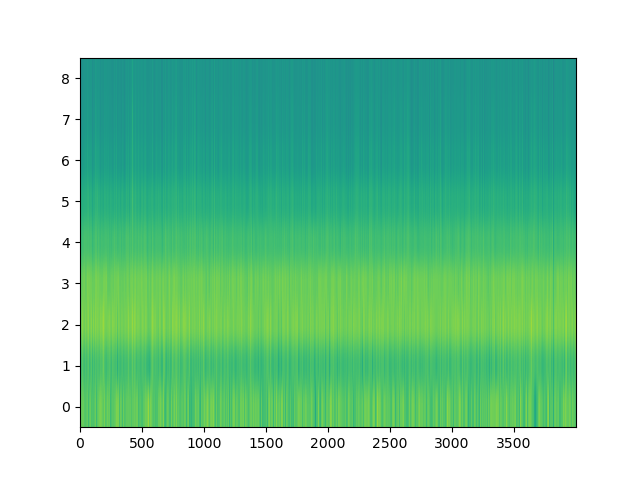

In [66]:
df['dBA']=10*np.log10(((10**((df[bands]+pd.Series({k:v for k,v in zip(bands,acorr)}))/10))).sum(axis=1))
df['dBZ']=10*np.log10(((10**((df[bands])/10))).sum(axis=1))
plt.figure()
plt.imshow(df[bands].tail(4000).T,aspect='auto',origin='lower')

<IPython.core.display.Javascript object>


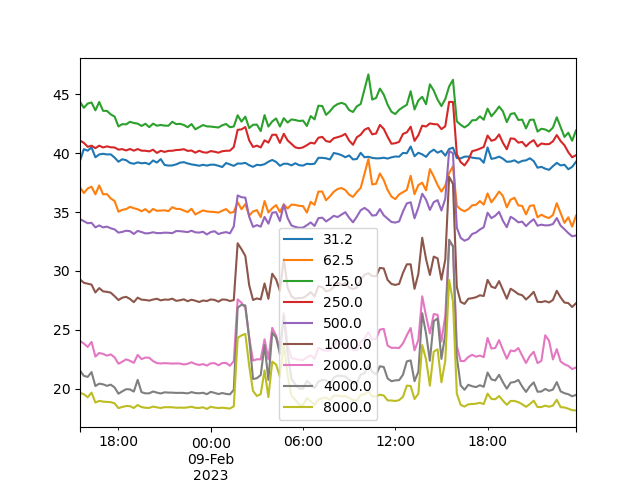

<AxesSubplot:xlabel='0'>

In [67]:
df.iloc[:,1:10].groupby(pd.Grouper(freq='15min')).quantile(.5).plot()


<IPython.core.display.Javascript object>


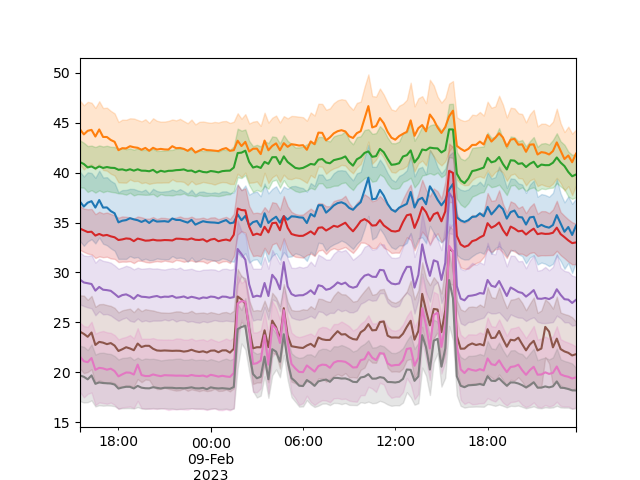

In [68]:
_,ax = plt.subplots(1)
freq = '15min'
for band in bands[1:]:
    df[band].groupby(pd.Grouper(freq=freq)).quantile(.5).plot(ax=ax)
    ln = ax.get_lines()[-1]
    xl = df[band].groupby(pd.Grouper(freq=freq)).quantile(.25)
    xu = df[band].groupby(pd.Grouper(freq=freq)).quantile(.75)
    plt.fill_between(xl.index,xl,xu,color=ln.get_color(),alpha=.2)

In [60]:
(df.groupby(pd.Grouper(freq=freq)).quantile(.75)-df.groupby(pd.Grouper(freq=freq)).quantile(.25)).mean()

dBrms    1.798406
31.2     6.793828
62.5     4.784367
125      1.930031
250      4.565297
500      5.092570
1000     4.635531
2000     4.679359
4000     5.514039
8000     5.754820
Nil      0.000000
dBA      3.108623
dBZ      1.878267
dtype: float64

<IPython.core.display.Javascript object>


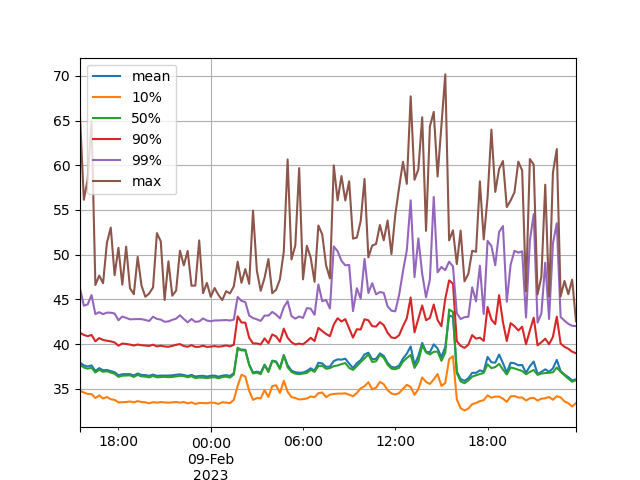

In [69]:
_,ax = plt.subplots(1)
df['dBA'].groupby(pd.Grouper(freq='15min')).mean().plot(ax=ax)
df['dBA'].groupby(pd.Grouper(freq='15min')).quantile(.1).plot(ax=ax)
df['dBA'].groupby(pd.Grouper(freq='15min')).quantile(.5).plot(ax=ax)
df['dBA'].groupby(pd.Grouper(freq='15min')).quantile(.9).plot(ax=ax)
df['dBA'].groupby(pd.Grouper(freq='15min')).quantile(.99).plot(ax=ax)
df['dBA'].groupby(pd.Grouper(freq='15min')).max().plot(ax=ax)
ax.legend(['mean','10%','50%','90%','99%','max'])
ax.grid()

<IPython.core.display.Javascript object>


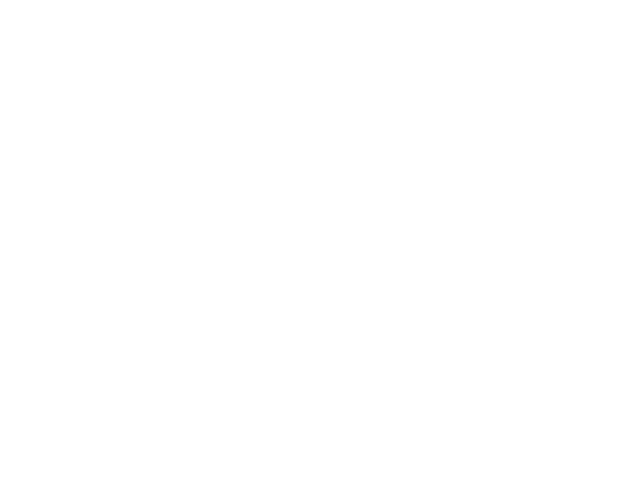

In [11]:
plt.figure()
dfs = df.sample(2000)
plt.plot(dfs.dBrms,dfs.dBZ,'.')
plt.grid()

In [12]:
#plt.figure()
#(10*np.log10(10**(df['dBrms']/10)-10**(df['dBZ']/10))).plot()

<IPython.core.display.Javascript object>


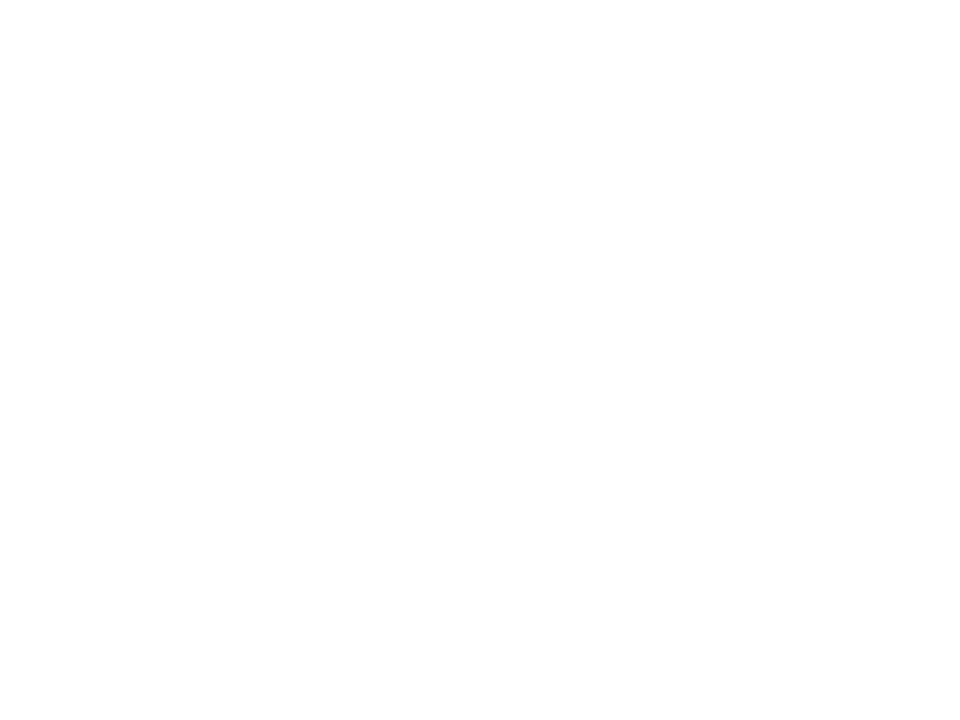

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([0.00000000e+00, 1.22070312e-04, 2.44140625e-04, ...,
        9.99755859e-01, 9.99877930e-01, 1.00000000e+00]),
 array([  4096.,  12224.,  20352.,  28480.,  36608.,  44736.,  52864.,
         60992.,  69120.,  77248.,  85376.,  93504., 101632., 109760.,
        117888., 126016., 134144., 142272., 150400., 158528., 166656.,
        174784., 182912., 191040., 199168., 207296., 215424., 223552.,
        231680., 239808., 247936., 256064., 264192., 272320., 280448.,
        288576., 296704., 304832., 312960., 321088., 329216., 337344.,
        345472.]),
 <matplotlib.image.AxesImage at 0x13fc28880>)

In [32]:
plt.figure()
plt.specgram(df['dBrms'].values,NFFT=2**14,detrend='mean')

In [31]:
df.dBrms.describe()

count    714859.000000
mean         49.564217
std           3.489722
min          32.583000
25%          47.227000
50%          49.543000
75%          51.873000
max          82.894000
Name: dBrms, dtype: float64

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(df[bands[1:]].fillna(-80))
p = PCA(n_components=len(bands)-1)
p.fit(X)
Xt=p.transform(X)

<IPython.core.display.Javascript object>


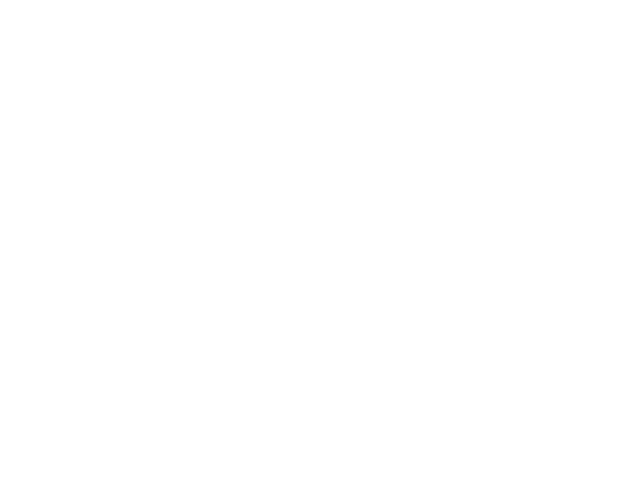

In [17]:
plt.figure()
plt.plot(Xt[:,0])

In [18]:
p.components_

array([[-0.19944402, -0.22019315, -0.23273763, -0.36261385, -0.41665182,
        -0.4285586 , -0.42930876, -0.4295512 ],
       [-0.67327874, -0.66256238, -0.06671748,  0.09905524,  0.13128836,
         0.15207232,  0.16486032,  0.16094137],
       [ 0.15670195,  0.03844332, -0.96036153, -0.02063631,  0.08665251,
         0.12602082,  0.12508174,  0.11050403],
       [-0.00593389, -0.01222577, -0.10692971,  0.92518398, -0.13439302,
        -0.18482944, -0.21431055, -0.18510414],
       [-0.01813068, -0.00481477, -0.02097686, -0.04387371,  0.87085494,
        -0.11356349, -0.33495169, -0.33735077],
       [ 0.00608445, -0.01448782,  0.01383181,  0.0018668 , -0.1562184 ,
         0.83636566, -0.20352017, -0.48396913],
       [-0.69420052,  0.71453618, -0.08367263, -0.00348447, -0.01128869,
         0.01768229, -0.00699807,  0.00462191],
       [-0.00685598,  0.01018267,  0.00461408,  0.01916961,  0.02597199,
        -0.17450366,  0.75715159, -0.62853475]])

In [19]:
df[df.dBA<-100]

,dBrms,31.2,62.5,125,250,500,1000,2000,4000,8000,Nil,dBA,dBZ
0,,,,,,,,,,,,,


<IPython.core.display.Javascript object>


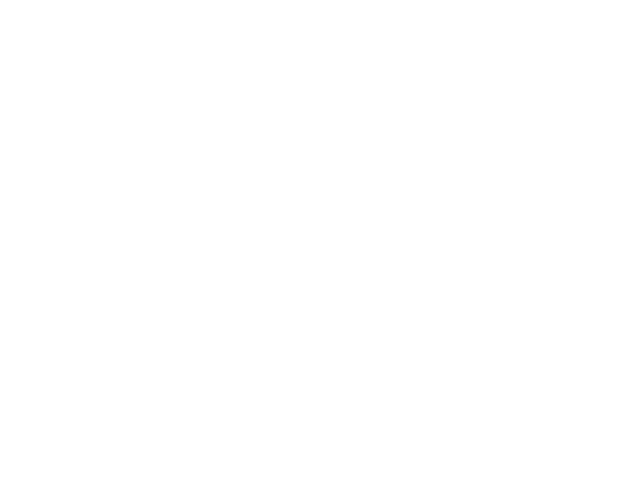

/Users/goios/Software/miniconda3/envs/unsw/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='0'>

In [20]:
plt.figure()
(10*np.log10(10**(df.dBrms/10)-10**(df.dBZ/10))).groupby(pd.Grouper(freq='15min')).mean().plot()

In [21]:
(10*np.log10(10**(df.dBrms/10)-10**(df.dBZ/10))).describe()

/Users/goios/Software/miniconda3/envs/unsw/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    710847.000000
mean         41.938528
std           6.874352
min          -7.452597
25%          37.238629
50%          42.812349
75%          47.179031
max          77.148655
dtype: float64